In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [2]:
cid = "4fd28cf130c740b79f847195351fd7ed"
secret = "d97eaad9ff484e0f985c2f142e8b0701"
username = 'jwxkomefm2s1eqdqmztzrrral'
redirect_uri = "http://localhost:9000/callback"

In [3]:
scope = 'user-library-read playlist-modify-public playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)

token = util.prompt_for_user_token(username,scope,cid,secret,redirect_uri)

if token:
  sp = spotipy.Spotify(auth=token)
  
else:
  print("Can't get token for", username)

In [4]:
import pandas as pd

# https://open.spotify.com/playlist/4zCk03i7meyK5r0UgWx1iW?si=ab4029ffb799493b
sourcePlaylistID = "4zCk03i7meyK5r0UgWx1iW"
sourcePlaylist = sp.user_playlist(username,sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []


for i in range(0, len(songs)):
  if songs[i]['track']['id']!=None:
    track_ids.append(songs[i]['track']['id'])
    track_names.append(songs[i]['track']['name'])
    
features = []


for i in range(0,len(track_ids)):
  audio_features  = sp.audio_features(track_ids[i])
  for track in audio_features:
    features.append(track)
    
    
playlist_df = pd.DataFrame(features,index = track_names)


In [5]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]


In [6]:
playlist_df.shape


(10, 13)

In [7]:
playlist_df['ratings']=[10, 9, 9, 10, 8, 6, 8, 4, 3, 5]


In [8]:
playlist_df

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
champagne problems,0sY6ZUTh4yoctD8VIXz339,0.920,0.462,244000,0.240,0.000000,0,0.1130,-12.077,1,0.0377,171.319,0.3200,10
hoax,6MWoRt97mnSTXZhu3ggi9C,0.966,0.662,220043,0.181,0.000004,8,0.1330,-15.065,1,0.0415,118.819,0.4290,9
Everything Has Changed (feat. Ed Sheeran) (Taylor’s Version),7qEUFOVcxRI19tbT68JcYK,0.271,0.498,245427,0.610,0.000000,6,0.2230,-5.098,1,0.0363,79.918,0.4740,9
Nothing's Gonna Hurt You Baby,3GhsBdS9ulPK3KCdwHRPhG,0.272,0.509,286293,0.331,0.136000,4,0.1140,-14.083,1,0.0267,96.848,0.0957,10
Be My Mistake,18UsAG7SfOQ5sxJEdjAMH0,0.835,0.572,256689,0.155,0.000137,6,0.0906,-14.405,1,0.0344,109.923,0.0949,8
Fallingforyou,2TgxCUZdHFkPEVmFge1OSd,0.892,0.264,240671,0.285,0.000471,1,0.3440,-15.208,1,0.0385,84.825,0.0776,6
Like Real People Do,57V4uc2b2diZ4RPHXWecb9,0.921,0.539,198027,0.179,0.393000,7,0.1060,-14.330,1,0.0309,140.010,0.1450,8
cardigan,4R2kfaDFhslZEMJqAFNpdd,0.537,0.613,239560,0.581,0.000345,0,0.2500,-8.588,0,0.0424,130.033,0.5510,4
enough for you,2TOzTqQXNmR2zDJXihjZ2e,0.753,0.638,202827,0.259,0.000000,7,0.2190,-10.706,1,0.0898,88.485,0.2690,3
Heather,4xqrdfXkTW4T0RauPLv3WA,0.584,0.357,198040,0.425,0.000000,5,0.3220,-7.301,1,0.0333,102.078,0.2700,5


In [9]:
X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']

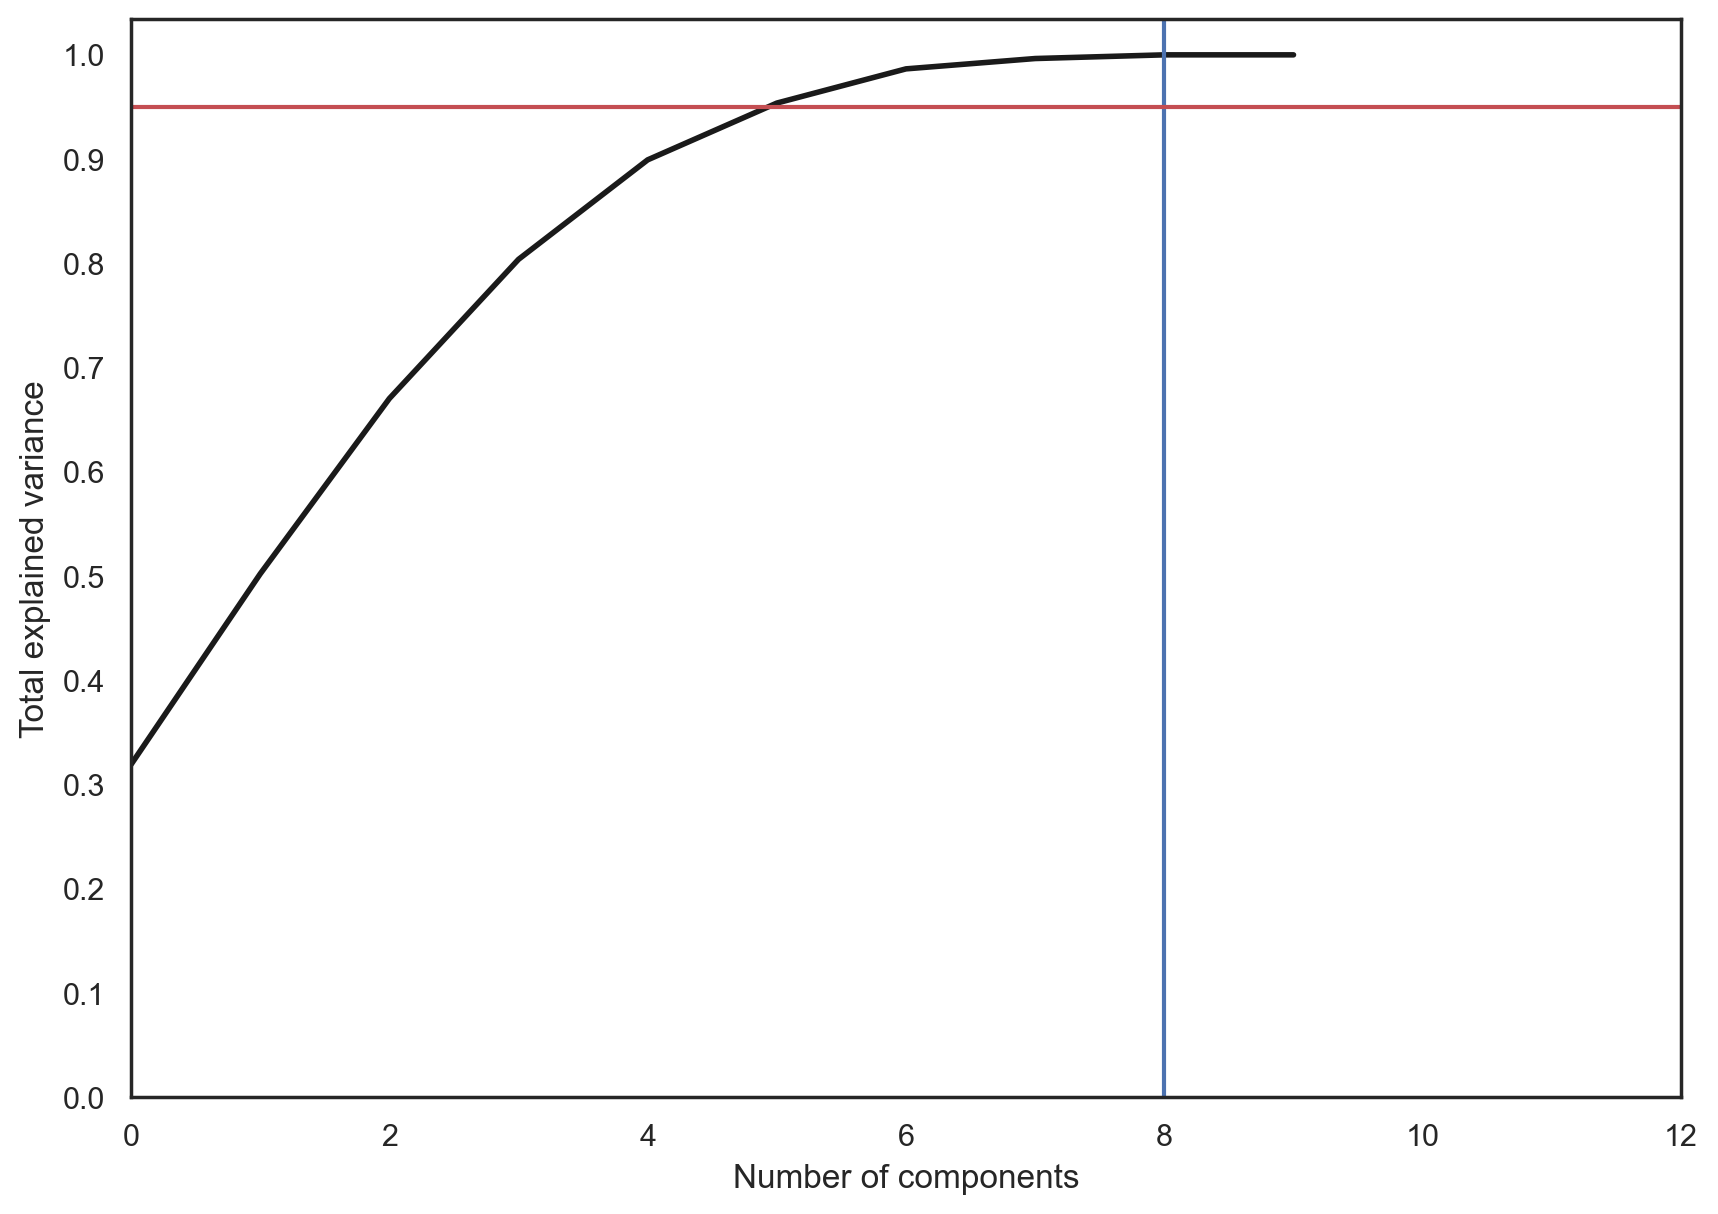

In [10]:
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)


plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k',lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0,12)
plt.yticks(np.arange(0,1.1,0.1))
plt.axvline(8,c='b')
plt.axhline(0.95,c='r')
plt.show();

In [11]:
# Fit your dataset to the optimal pca
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(sublinear_tf = True, ngram_range=(1,6),
                   max_features=10000)
X_names_sparse=v.fit_transform(track_names)
X_names_sparse.shape

(10, 76)

In [13]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse]))

In [14]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors':range(1,10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid= GridSearchCV(knn,knn_params,cv=skf,n_jobs =-1,verbose=True)
knn_grid.fit(X_train_last,y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.1 0.1 0.1 0.  0.  nan nan nan nan]
  warnings.warn(


({'n_neighbors': 1}, 0.1)

In [16]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_features':[4,7,8,10],'min_samples_leaf':[1,3,5,8],'max_depth':[3,5,8]}
rfc = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,oob_score=True)
forest_grid = GridSearchCV(rfc,parameters,n_jobs=-1,cv=skf,verbose=1)
forest_grid.fit(X_train_last,y_train)
forest_grid.best_estimator_ , forest_grid.best_score_

Fitting 2 folds for each of 48 candidates, totalling 96 fits


C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 486, in fit
    self._set_oob_score_and_attributes(X, y)
  File "C:\anaconda3\

(RandomForestClassifier(max_depth=3, max_features=4, n_jobs=-1, oob_score=True,
                        random_state=42),
 nan)

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier()

tree_params = {'max_depth':range(1,11),'max_features':range(4,19)}
tree_grid = GridSearchCV(tree,tree_params,cv=skf,n_jobs=-1,verbose=True)
tree_grid.fit(X_train_last,y_train)
tree_grid.best_estimator_ , tree_grid.best_score_


Fitting 2 folds for each of 150 candidates, totalling 300 fits


C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


(DecisionTreeClassifier(max_depth=4, max_features=6), 0.30000000000000004)

In [18]:
rec_tracks=[]

for i in playlist_df['id'].values.tolist():
  rec_tracks += sp.recommendations(seed_tracks=[i],limit = int(len(playlist_df)/2))['tracks'];
  

rec_track_ids=[]
rec_track_names = []
for i in rec_tracks:
  rec_track_ids.append(i['id'])
  rec_track_names.append(i['name'])

In [19]:
rec_features=[]

for i in range(0,len(rec_track_ids)):
  rec_audio_features = sp.audio_features(rec_track_ids[i])
  for track in rec_audio_features:
    rec_features.append(track)
    
    
rec_playlist_df= pd.DataFrame(rec_features,index = rec_track_ids)

In [20]:
rec_playlist_df = rec_playlist_df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]


In [21]:
tree_grid.best_estimator_.fit(X_train_last,y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
X_test_pca  = pca.transform(rec_playlist_df_scaled)
X_test_names = v.transform(rec_track_names)
X_test_last = csr_matrix(hstack([X_test_pca,X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [22]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings',ascending=False)
rec_playlist_df = rec_playlist_df.reset_index()
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()

In [23]:
username = 'jwxkomefm2s1eqdqmztzrrral'
playlist_recs =sp.user_playlist_create(username,name="Generated Recommended Songs for Playlist - {}".format(sourcePlaylist['name']))

In [24]:
playlist_recs

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/4A1C9LgWH4dAsTwA4BQDDm'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/4A1C9LgWH4dAsTwA4BQDDm',
 'id': '4A1C9LgWH4dAsTwA4BQDDm',
 'images': [],
 'name': 'Generated Recommended Songs for Playlist - Normal Day',
 'owner': {'display_name': 'Harsh',
  'external_urls': {'spotify': 'https://open.spotify.com/user/jwxkomefm2s1eqdqmztzrrral'},
  'href': 'https://api.spotify.com/v1/users/jwxkomefm2s1eqdqmztzrrral',
  'id': 'jwxkomefm2s1eqdqmztzrrral',
  'type': 'user',
  'uri': 'spotify:user:jwxkomefm2s1eqdqmztzrrral'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSw4NWQ1YWZjMjk4ZGY1Mjk5MjYxMjNhMDkyNWVhNzI0NmQ3ZGZlMWNm',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/4A1C9LgWH4dAsTwA4BQDDm/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri

In [25]:
len(recs_to_add)

48

In [26]:
sp.user_playlist_add_tracks(username,playlist_recs['id'],recs_to_add);
